# CMSE 381 Final Project Template

**INSTRUCTIONS**: This is a template to help organize your project.  All projects should include the 5 major sections below (you do not need to use this template file).  If you use this file, complete your work below and remove content in parentheses. Also, remove this current cell.  

#### CMSE 381 Final Project
### &#9989; Group members: Kyle Landolt, Isaac
### &#9989; Section_001
#### &#9989; 4/16/2025

# ___Can we classify the facial orientation by finding what Neurons are firing?___

## Background and Motivation

_(Provide context for the problem.  **We want to answer whether or not the neurons that are firing can tell us what position of the face the monkey is seeing. We got this motivation by just brainstorming a few problems by checking the dataset. We looked through the data and read the research paper, and decided on this together. We were really intrigued by the fact that monkeys can potentially detect a person's face better at certain positions through parts of their brains. We want to discover and see if we are able to predict the facial orientation due to the amount of neural activity spiking in the Monkeys brain**)_

## Methodology
_(How did you go about answering your question(s)? You should wrote some code here to demonstrate what the data is like and how in principle your method works. You can leave the variations of the related to specific results to the results section.)_

In [9]:
import pandas as pd #This helps us read in the data
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict #This is how the k-fold is used
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay #This displays the confusion matrix after the k-fold cv
import matplotlib.pyplot as plt #This one is for plotting

#Kyle - our current plan is that I will be doing a logistic regression model and Isaac will be doing a decision tree about our research question.
#I am going to go through our old class jupyter notebooks where we worked on logistic regression and set up multiple models with our current dataset. I will
#write a little pseudocode once I get the code going.

In [10]:
data = pd.read_csv('raster_data_lupo_am_site157.csv') #Reads in dataset
data["is_front"] = (data["labels.orientation"] == "front").astype(int) #This creates a new column of just front data to train
X = data.filter(like="time") #This filters the data for all of the time columns (I had to look this one up for all the time parts through ChatGPT)
y = data["is_front"] #assigns y to our dependent variable
from sklearn.linear_model import LogisticRegression #importing LogisticRegression function from sklearn module
from sklearn.model_selection import cross_val_score #
clf = LogisticRegression(max_iter=1000)
scores = cross_val_score(clf, X, y, cv=5)
print("Mean accuracy (binary):", scores.mean())

Mean accuracy (binary): 0.8725422160536664


### Data
_(Describe the data you are using. What variables are you using? What they mean? Why did you choose them?)_

In [11]:
Our dataset consists of a LOT of features, mainly we are looking at the feature "labels.orientation", which is a string that represents what
side of the face the monkey is seeing. Outside of the times, we have 6 important features other than the times, "site_info.monkey", "site_info.region"
,"labels.stimID", "labels.person", "labels.orientation", and "labels.orient_person_combo"

SyntaxError: invalid syntax (212748407.py, line 1)

In [ ]:
site_info.monkey: "Name of the monkey (always lupo)"
site_info.region "Region of the brain where the data is being collected from (always am), (I looked it up, this means"
labels.stimID: "An ID number that connects the person and the type of orientation that the picture is
labels.person: "The person who the picture is of, in this dataset it is 1 0f 25 people" 
labels.orientation: "String that represents what side of the face the monkey is being shown"
labels.orient_person_combo: "Just the orientation and then an int value that is the number in labels.person"
All time variables: "Binary value meaning either 1 or 0 where 1 represents a neural activity spike and 0 represents the other side"
#We chose orientation because a lot of these predictors are pretty irrelevant. First off, region and monkey are always the same value,
#second off, stimID, orientation_person_combo, and person arent very telling predictors, so we went with our predictor we liked the most,
#orientation

In [12]:
data = pd.read_csv('raster_data_lupo_am_site157.csv')
data.head(5)
#Here is the dataset loaded in and looked at and you can see that the predictors I described in the previous tab are all here

,site_info.monkey,site_info.region,labels.stimID,labels.person,labels.orientation,labels.orient_person_combo,time.1_2,time.2_3,time.3_4,time.4_5,...,time.791_792,time.792_793,time.793_794,time.794_795,time.795_796,time.796_797,time.797_798,time.798_799,time.799_800,time.800_801
0,lupo,am,1,1,front,front 1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,lupo,am,1,1,front,front 1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,lupo,am,1,1,front,front 1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,lupo,am,2,2,front,front 2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,lupo,am,2,2,front,front 2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Models for classification _(if applicable)_
_(What models will you be using for classification? Why did you choose to use them? What questions would you answer with them? How would you evaluate if each model? What cross-validation method did you use?)_

In [13]:
# you may add some code here to show how the model works in principle

### Models for regression _(if applicable)_
_(What models will you be using for regression? Why did you choose to use them? What questions would you answer with them? How would you evaluate if each model? What cross-validation method did you use?)_

In [31]:
# you may add some code here to show how the model works in principle
data = pd.read_csv('raster_data_lupo_am_site157.csv') #Reads in dataset
data = data.drop(data.columns[405:806], axis = 1)
orientations = ['right 3/4','front','left profile','left 3/4','up','back','down','right profile']
for orientation in orientations:
    data["is_front"] = (data["labels.orientation"] == orientation).astype(int) #This creates a new column of just front data to train
    X = data.filter(like="time") #This filters the data for all of the time columns (I had to look this one up for all the time parts through ChatGPT)
    y = data["is_front"] #assigns y to our dependent variable
    from sklearn.linear_model import LogisticRegression #importing LogisticRegression function from sklearn module
    from sklearn.model_selection import cross_val_score
    clf = LogisticRegression(max_iter=1000, class_weight='balanced')
    scores = cross_val_score(clf, X, y, cv=5)
    print("Mean accuracy (binary) for",orientation,":", scores.mean())

Mean accuracy (binary) for right 3/4 : 0.8239879713162157
Mean accuracy (binary) for front : 0.8451885264862364
Mean accuracy (binary) for left profile : 0.8255378209576684
Mean accuracy (binary) for left 3/4 : 0.8361323155216285
Mean accuracy (binary) for up : 0.8225075179273652
Mean accuracy (binary) for back : 0.8543372657876475
Mean accuracy (binary) for down : 0.8588595882489012
Mean accuracy (binary) for right profile : 0.8225422160536663


right 3/4 labels.orientation
0    570
1     89
Name: count, dtype: int64


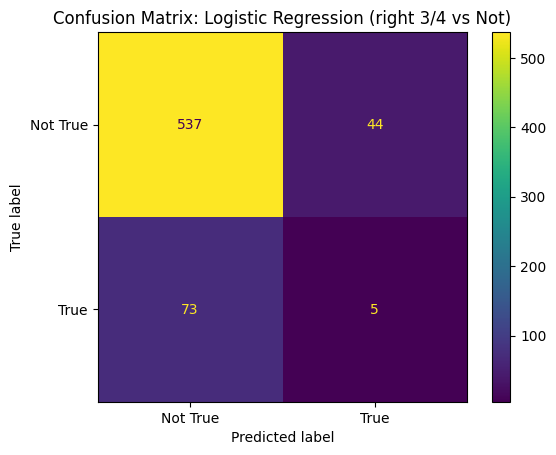

front labels.orientation
0    581
1     78
Name: count, dtype: int64


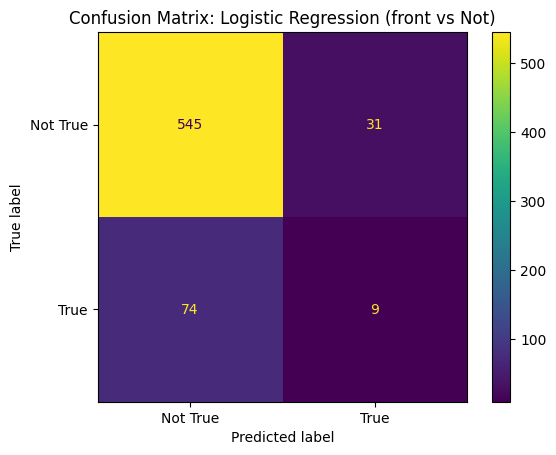

left profile labels.orientation
0    576
1     83
Name: count, dtype: int64


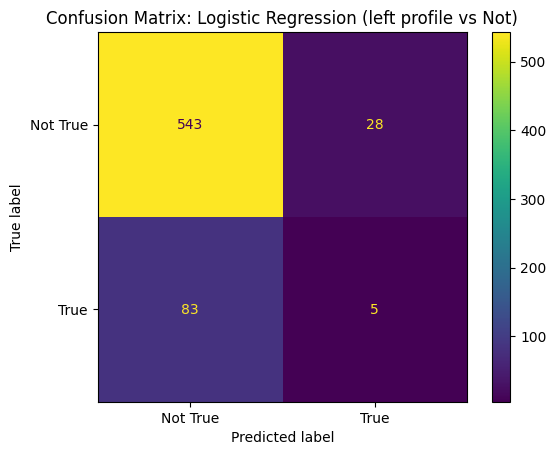

left 3/4 labels.orientation
0    571
1     88
Name: count, dtype: int64


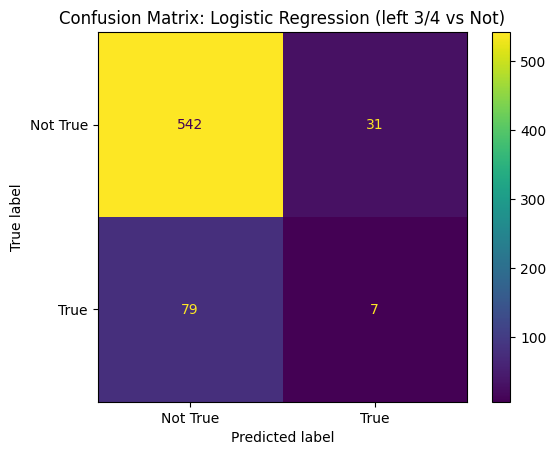

up labels.orientation
0    573
1     86
Name: count, dtype: int64


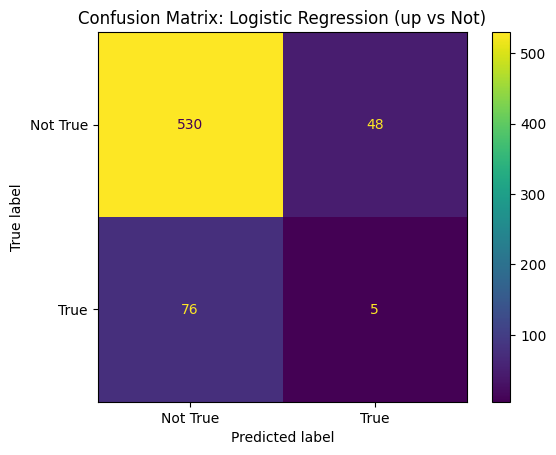

back labels.orientation
0    578
1     81
Name: count, dtype: int64


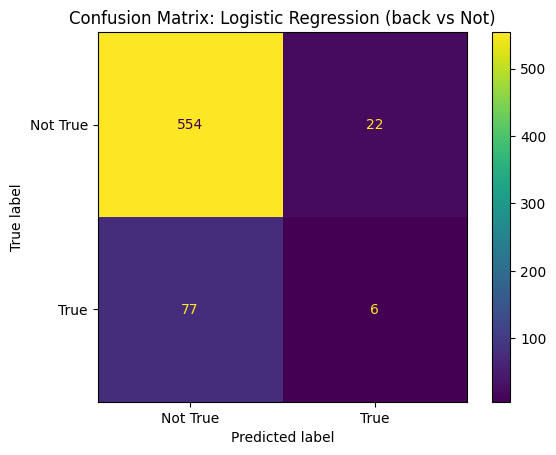

down labels.orientation
0    576
1     83
Name: count, dtype: int64


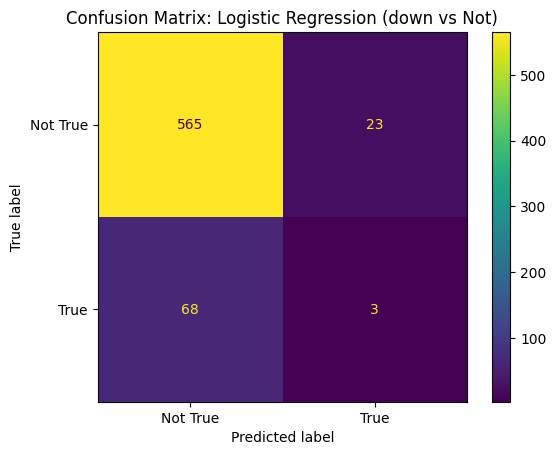

right profile labels.orientation
0    588
1     71
Name: count, dtype: int64


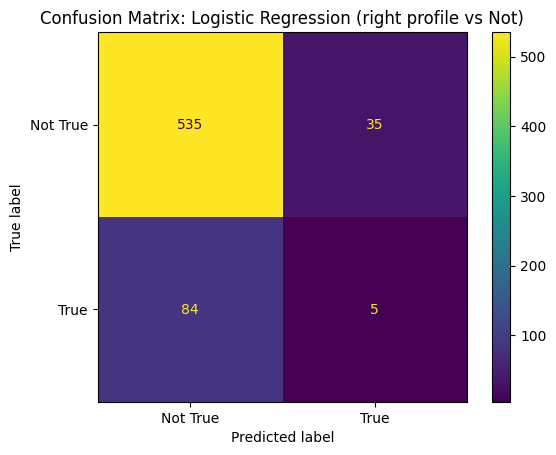

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
data = pd.read_csv('raster_data_lupo_am_site157.csv')
data = data.drop(data.columns[405:806], axis = 1)
orientations = ['right 3/4','front','left profile','left 3/4','up','back','down','right profile']
for orientation in orientations:
    print(orientation, y.value_counts())
    X = data.filter(like="time")
    y = (data["labels.orientation"] == orientation).astype(int)
    clf = LogisticRegression(max_iter=1000, class_weight='balanced')
    y_pred = cross_val_predict(clf, X, y, cv=10)
    cm = confusion_matrix(y, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not True", "True"])
    disp.plot()
    plt.title(f"Confusion Matrix: Logistic Regression ({orientation} vs Not)")
    plt.show()


In [35]:
X = data.filter(like="time")
spike_counts_per_feature = X.sum(axis=0)
spike_counts_per_feature = spike_counts_per_feature.sort_values(ascending=False)
print(spike_counts_per_feature.head(10))

time.6_7        6
time.123_124    5
time.22_23      5
time.44_45      5
time.36_37      5
time.60_61      4
time.89_90      4
time.342_343    4
time.61_62      4
time.370_371    4
dtype: int64


In [36]:
X = data.filter(like="time")
data["total_spikes"] = X.sum(axis=1)
data.groupby("labels.orientation")["total_spikes"].mean().sort_values(ascending=False)


labels.orientation
right 3/4        1.115385
front            1.036145
up               0.975309
right profile    0.786517
down             0.718310
left 3/4         0.639535
left profile     0.613636
back             0.469880
Name: total_spikes, dtype: float64

### Other methods used _(if applicable)_

_(If this is a preprocessing step to prepare your data for regression or classification models, you should put this subsection before your explanation for the regression or classification models.)_

_(What method did you use otherwise? Why did you choose to use them? What questions would you answer with them? How would you evaluate the results? What cross-validation method did you use when applicable?)_

In [ ]:
# you may add some code here to show how the method works in principle

# you may add some code here to show how the model works in principle

## Results

_(What did you find when you carried out your methods? Some of your code related to
presenting results/figures/data may be replicated from the methods section or may only be present in
this section. All of the plots that you plan on using for your presentation should be present in this
section)_

### classification results
_(What are you trying to do here?)_

In [ ]:
# how did you do it

_(How do you interpret what you see?)_

_(What are you doing next?)_

In [ ]:
# how did you do it (etc. etc.)

### regression results
_(What are you trying to do here?)_

In [ ]:
# how did you do it

_(How do you interpret what you see?)_

_(What are you doing next?)_

In [ ]:
# how did you do it (etc. etc.)

### other results
_(What are you trying to do here?)_

In [ ]:
# how did you do it

_(How do you interpret what you see?)_

_(What are you doing next?)_

In [ ]:
# how did you do it (etc. etc.)

## Discussion and Conclusion

_(What did you learn from your results? What obstacles did you run into? What would you do differently next time? Clearly provide quantitative answers to your question(s)?  At least one of your questions should be answered with numbers.  That is, it is not sufficient to answer "yes" or "no", but rather to say something quantitative such as variable 1 increased roughly 10% for every 1 year increase in variable 2.)_

### discussion on the classification results

### discussion on the regression results

### discussion on the other results

### conclusion and future steps

## Author contribution

_(Please describe the contribution of each member of group)._

## References

_(List the source(s) for any data and/or literature cited in your project.  Ideally, this should be formatted using a formal citation format (MLA or APA or other, your choice!).   Multiple free online citation generators are available such as <a href="http://www.easybib.com/style">http://www.easybib.com/style</a>. **Important:** if you use **any** code that you find on the internet for your project you **must** cite it or you risk losing most/all of the points for you project.)_